**Classificação de textos do Tweeter com spaCy**



# Etapa 1: Importação e instalação das bibliotecas

In [1]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import re

In [2]:
spacy.__version__

'2.2.4'

# Etapa 2: Carregamento das bases de dados

* Link Kaggle: https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis#TweetsNeuralHash.csv

**Base de Treinamento**

* Negative label: 0
* Positive label: 1




In [3]:
from google.colab import files
uploaded = files.upload()

Saving Train50.csv to Train50.csv


In [4]:
base_treinamento = pd.read_csv('/content/Train50.csv', delimiter=';')

In [5]:
base_treinamento.shape

(50000, 5)

In [6]:
base_treinamento.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [7]:
# Verificando os ultimos registros.
base_treinamento.tail()

,id,tweet_text,tweet_date,sentiment,query_used
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(
49999,1046762735340584962,@Renk_lol Passa ano Entra ano Eu nao desisto d...,Mon Oct 01 14:04:18 +0000 2018,0,:(


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


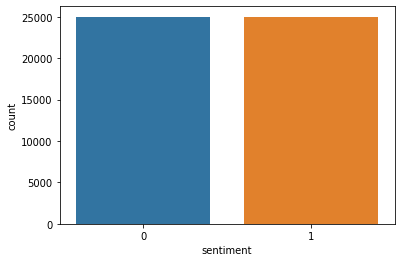

In [8]:
# Visualizando o gráfico 
sns.countplot(base_treinamento['sentiment'], label = 'Contagem');

In [9]:
# Removendo colunas
base_treinamento.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [10]:
base_treinamento.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


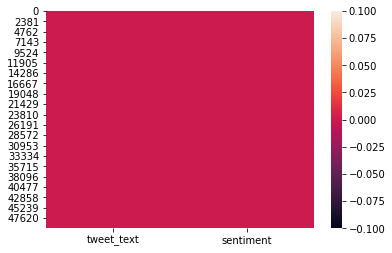

In [11]:
# Verificando se existe campo nulos
sns.heatmap(pd.isnull(base_treinamento));

# **Base de teste**

In [12]:
base_teste = pd.read_csv('/content/Train50.csv', delimiter=';')

In [13]:
base_teste.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [14]:
base_teste.shape

(50000, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


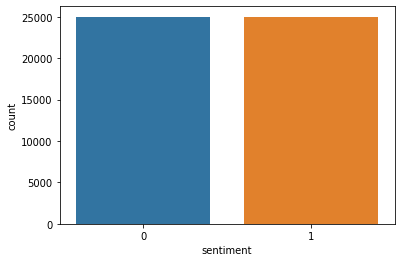

In [15]:
sns.countplot(base_teste['sentiment'], label='Contagem')

In [16]:
base_teste.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [17]:
base_teste.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


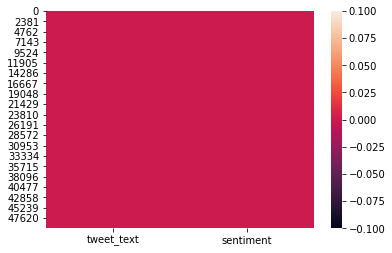

In [18]:
sns.heatmap(pd.isnull(base_teste));

# Etapa 3: Função para pré-processamento dos textos

* Letras minúsculas
* Nome do usuário (@)
* URLS
* Espaços em branco
* Emoticons
* Stop Words
* Lematização
* Pontuações




In [20]:
!python -m spacy download pt

     |████████████████████████████████| 21.2MB 84.7MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-cp36-none-any.whl size=21186282 sha256=44f9886241ab6cf5df1a94f8a6b9a77a62e8e754dd832ebc344deb845de68dfb
  Stored in directory: /tmp/pip-ephem-wheel-cache-mtwlp4dn/wheels/ea/94/74/ec9be8418e9231b471be5dc7e1b45dd670019a376a6b5bc1c0
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [21]:
pln = spacy.load('pt')
pln

In [22]:
base_treinamento['tweet_text'][1]

'@behin_d_curtain Para mim, é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'

In [23]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS

In [24]:
print(stop_words)

{'da', 'disso', 'quanto', 'minhas', 'sou', 'se', 'nesse', 'minha', 'sua', 'às', 'favor', 'último', 'demais', 'vinte', 'em', 'questão', 'estás', 'vez', 'diante', 'nova', 'maior', 'vossas', 'primeira', 'obrigado', 'debaixo', 'os', 'são', 'ou', 'fazes', 'outra', 'usar', 'área', 'numa', 'toda', 'sete', 'no', 'novas', 'sempre', 'zero', 'contra', 'possivelmente', 'aquelas', 'duas', 'posso', 'tenho', 'inicio', 'possível', 'fomos', 'porquê', 'custa', 'usa', 'apoio', 'perto', 'breve', 'obrigada', 'pelas', 'quero', 'comprida', 'ver', 'vossa', 'és', 'final', 'teve', 'vós', 'nada', 'vinda', 'quarto', 'tentaram', 'grandes', 'embora', 'entre', 'podem', 'forma', 'ligado', 'tens', 'seu', 'estava', 'exemplo', 'tarde', 'tentar', 'elas', 'estou', 'ter', 'também', 'te', 'próprio', 'quarta', 'seria', 'próximo', 'três', 'alguns', 'longe', 'sexta', 'vários', 'meus', 'mil', 'ir', 'ele', 'vezes', 'quinze', 'acerca', 'ali', 'relação', 'aqui', 'num', 'vem', 'vindo', 'falta', 'teu', 'direita', 'me', 'segunda', 's

In [36]:
def preprocessamento(texto):
  #letras minúsculas
  texto = texto.lower()

  #nome do usuário
  texto = re.sub(r"@[A-Za-z0-9$-_@.$+]+", ' ', texto)

  #urls
  texto = re.sub(r"https?://[A-Za-Z0-9./]+", ' ', texto)

  # Espaço em branco
  texto = re.sub(r" +", ' ', texto)

  # emoticons
  lista_emocoes = {':)': 'emocaopositiva',
                   ':d': 'emocaopositiva',
                   ':(': 'emocaonegativa'}
  for emocao in lista_emocoes:
    texto = texto.replace(emocao, lista_emocoes[emocao])

  #lematização
  documento = pln(texto)

  lista = []
  for token in documento:
    lista.append(token.lemma_)

  #Stop words
  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  
    

  return texto

In [37]:
texto_teste =  '@behin_d_curtain :D Para mim, :( http://www.iaexpert.com.br é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'
resultado = preprocessamento(texto_teste)
resultado

error: ignored

# Etapa 4: Pré-processamento da base de dados

**Limpeza dos textos**

In [38]:
base_treinamento.head(10)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
5,@KingJokerLeto mas amiga eu to aqui ainda :),1
6,"@RivasJairo Bravo, Jairo!!! :)))",1
7,@inquilinasls @Spotify socorro ksoaksosks acho...,1
8,"@chimekarlla gosto muito de fazenda :) , mas m...",1
9,Amanha vou ver venom :D,1


In [39]:
base_treinamento['texto_teste'] = base_treinamento['tweet_text'].apply(preprocessamento)

error: ignored

In [40]:
base_treinamento.head(10)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
5,@KingJokerLeto mas amiga eu to aqui ainda :),1
6,"@RivasJairo Bravo, Jairo!!! :)))",1
7,@inquilinasls @Spotify socorro ksoaksosks acho...,1
8,"@chimekarlla gosto muito de fazenda :) , mas m...",1
9,Amanha vou ver venom :D,1


# Tratamento da classe